In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('D:/BITS Work/Semester 2/Innovation/Projects/ml_projects/Customer_segmentation/train.csv')
df1.set_index("CustomerID",inplace=True)
df1["Gender"] = (df1["Gender"]=='Male').astype(int)

In [3]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [4]:
df2 = df1[df1["Gender"]==1]

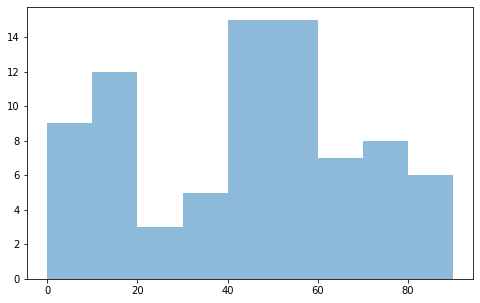

In [5]:
plt.figure(figsize=(8,5))
bins = np.arange(0,100,10)
_ = plt.hist(df2["Spending Score (1-100)"],bins=bins,alpha=0.5)

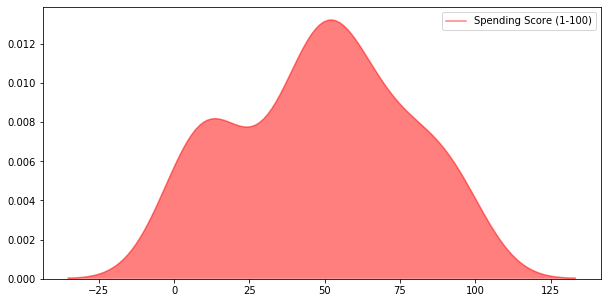

In [6]:
plt.figure(figsize=(10,5))
_ = sns.kdeplot(df2["Spending Score (1-100)"],shade=True,color='r',alpha=0.5)

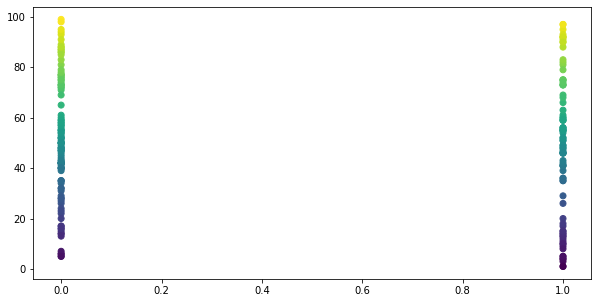

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(df1["Gender"],df1["Spending Score (1-100)"],c=df1["Spending Score (1-100)"])

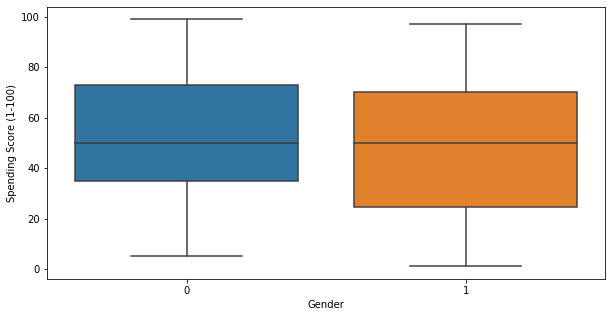

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(df1["Gender"],df1["Spending Score (1-100)"])

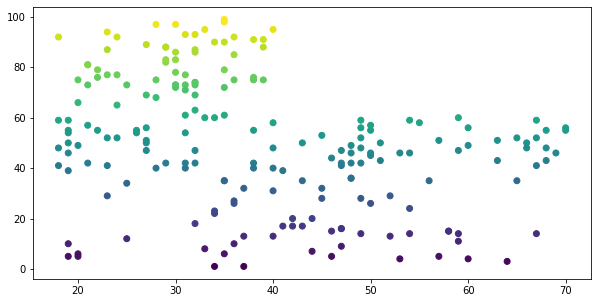

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df1["Age"],df1["Spending Score (1-100)"],c=df1["Spending Score (1-100)"])

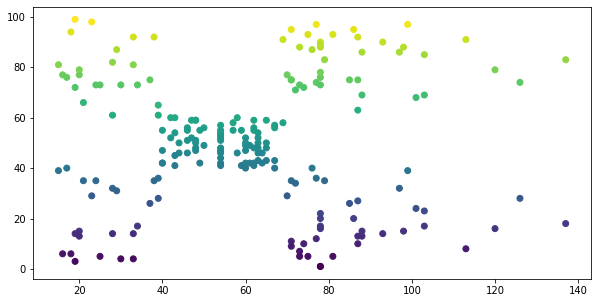

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c=df1["Spending Score (1-100)"])
# plt.scatter(KMean.cluster_centers_[:,1],KMean.cluster_centers_[:,2],marker='s')

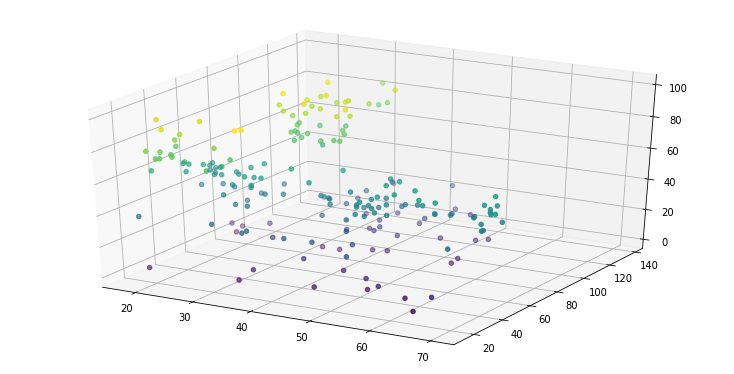

In [11]:
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(df1["Age"],df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c=df1["Spending Score (1-100)"])

In [12]:
#k=10 seems an appropriate choice by looking at the above plots
KMean = KMeans(n_clusters = 10)
KMean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
KMean.cluster_centers_

array([[  0.875     ,  26.625     ,  77.25      ,   9.125     ],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.41860465,  56.55813953,  53.95348837,  49.58139535],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.37142857,  26.94285714,  57.22857143,  50.11428571],
       [  0.41666667,  48.75      ,  24.58333333,   9.58333333],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.55555556,  47.72222222,  80.16666667,  18.94444444],
       [  0.38461538,  38.23076923,  30.38461538,  35.07692308],
       [  0.4       ,  32.2       , 109.7       ,  82.        ]])

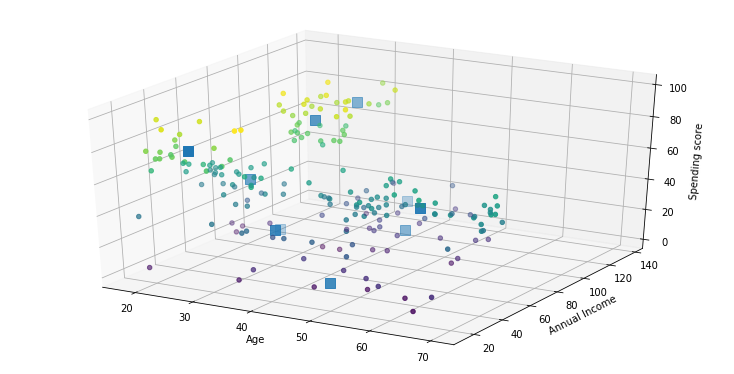

In [17]:
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending score')
ax.scatter(df1["Age"],df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c=df1["Spending Score (1-100)"])
ax.scatter(KMean.cluster_centers_[:,1],KMean.cluster_centers_[:,2],KMean.cluster_centers_[:,3], marker='s',s=100)

C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


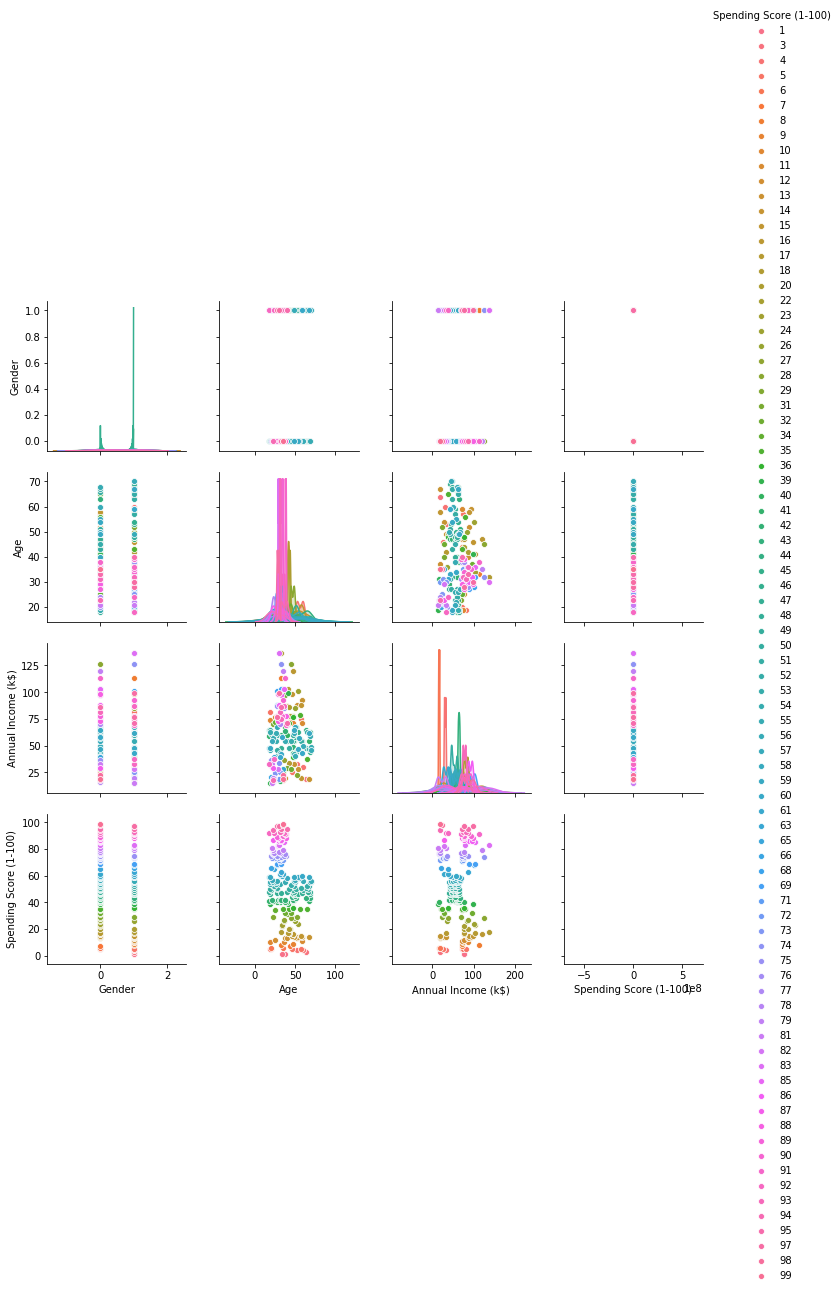

In [15]:
sns.pairplot(df1, hue="Spending Score (1-100)")